
# Creating a GeoDataFrame from a DataFrame with coordinates

This example shows how to create a ``GeoDataFrame`` when starting from
a *regular* ``DataFrame`` that has coordinates either WKT
([well-known text](https://en.wikipedia.org/wiki/Well-known_text>))
format, or in
two columns.


In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

From longitudes and latitudes
=============================

First, let's consider a ``DataFrame`` containing cities and their respective
longitudes and latitudes.



In [3]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

A ``GeoDataFrame`` needs a ``shapely`` object. We use geopandas
``points_from_xy()`` to transform **Longitude** and **Latitude** into a list
of ``shapely.Point`` objects and set it as a ``geometry`` while creating the
``GeoDataFrame``. (note that ``points_from_xy()`` is an enhanced wrapper for
``[Point(x, y) for x, y in zip(df.Longitude, df.Latitude)]``)



In [4]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

``gdf`` looks like this :



In [5]:
print(gdf.head())

           City    Country  Latitude  Longitude                     geometry
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-58.66000 -34.58000)
1      Brasilia     Brazil    -15.78     -47.91  POINT (-47.91000 -15.78000)
2      Santiago      Chile    -33.45     -70.66  POINT (-70.66000 -33.45000)
3        Bogota   Colombia      4.60     -74.08    POINT (-74.08000 4.60000)
4       Caracas  Venezuela     10.48     -66.86   POINT (-66.86000 10.48000)


Finally, we plot the coordinates over a country-level map.



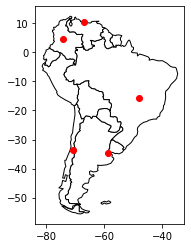

In [6]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

From WKT format
===============
Here, we consider a ``DataFrame`` having coordinates in WKT format.



In [7]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Coordinates': ['POINT(-58.66 -34.58)', 'POINT(-47.91 -15.78)',
                     'POINT(-70.66 -33.45)', 'POINT(-74.08 4.60)',
                     'POINT(-66.86 10.48)']})

We use ``shapely.wkt`` sub-module to parse wkt format:



In [8]:
from shapely import wkt

df['Coordinates'] = df['Coordinates'].apply(wkt.loads)

The ``GeoDataFrame`` is constructed as follows :



In [9]:
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')

print(gdf.head())

           City    Country                  Coordinates
0  Buenos Aires  Argentina  POINT (-58.66000 -34.58000)
1      Brasilia     Brazil  POINT (-47.91000 -15.78000)
2      Santiago      Chile  POINT (-70.66000 -33.45000)
3        Bogota   Colombia    POINT (-74.08000 4.60000)
4       Caracas  Venezuela   POINT (-66.86000 10.48000)


Again, we can plot our ``GeoDataFrame``.



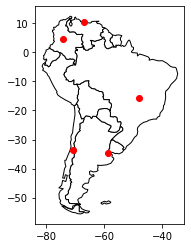

In [10]:
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')

plt.show()